Starting point

In [1]:
!pip install pandas scikit-learn torch torchvision tensorflow matplotlib --quiet


In [23]:
import pandas as pd

# If your CSV is in S3, you need s3fs package:
!pip install s3fs --quiet

s3_path = 's3://outputbucketclimatmodeling250928/canvas-data-prep-canvas-dw-export-s3-1753388986021/part-00000-a36d7fb4-404c-435a-88b1-3fe011ba1af6-c000.csv'  # update with your path
df = pd.read_csv(s3_path)
df.head()


,temperature_value,relativehumidity_value,atmosphericpressure_value,pressuretendency_value,windspeed_value,dateobserved_value,winddirection_value
0,11.7,69,1016.3,0.0,6.2,2020-05-14T00:00:00.000Z,157.5
1,11.2,75,1014.7,0.0,5.5,2020-05-14T03:00:00.000Z,157.5
2,11.9,82,1012.3,1.0,4.9,2020-05-14T06:00:00.000Z,157.5
3,15.8,73,1011.3,1.0,5.5,2020-05-14T09:00:00.000Z,180.0
4,23.9,52,1010.0,0.0,5.1,2020-05-14T12:00:00.000Z,180.0


In [24]:
df['datetime'] = pd.to_datetime(df['dateobserved_value'])


In [25]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second


In [26]:
df.head(10)

,temperature_value,relativehumidity_value,atmosphericpressure_value,pressuretendency_value,windspeed_value,dateobserved_value,winddirection_value,datetime,year,month,day,hour,minute,second
0,11.7,69,1016.3,0.0,6.2,2020-05-14T00:00:00.000Z,157.5,2020-05-14 00:00:00+00:00,2020,5,14,0,0,0
1,11.2,75,1014.7,0.0,5.5,2020-05-14T03:00:00.000Z,157.5,2020-05-14 03:00:00+00:00,2020,5,14,3,0,0
2,11.9,82,1012.3,1.0,4.9,2020-05-14T06:00:00.000Z,157.5,2020-05-14 06:00:00+00:00,2020,5,14,6,0,0
3,15.8,73,1011.3,1.0,5.5,2020-05-14T09:00:00.000Z,180.0,2020-05-14 09:00:00+00:00,2020,5,14,9,0,0
4,23.9,52,1010.0,0.0,5.1,2020-05-14T12:00:00.000Z,180.0,2020-05-14 12:00:00+00:00,2020,5,14,12,0,0
5,23.9,52,1010.0,0.0,5.1,2020-05-14T12:00:00.000Z,180.0,2020-05-14 12:00:00+00:00,2020,5,14,12,0,0
6,30.0,31,1007.8,1.0,4.3,2020-05-14T15:00:00.000Z,225.0,2020-05-14 15:00:00+00:00,2020,5,14,15,0,0
7,31.6,28,1006.2,1.0,4.3,2020-05-14T18:00:00.000Z,225.0,2020-05-14 18:00:00+00:00,2020,5,14,18,0,0
8,27.2,35,1008.0,0.0,2.2,2020-05-14T21:00:00.000Z,247.5,2020-05-14 21:00:00+00:00,2020,5,14,21,0,0
9,22.5,51,1009.8,2.0,0.7,2020-05-15T00:00:00.000Z,202.5,2020-05-15 00:00:00+00:00,2020,5,15,0,0,0


In [29]:
cols_to_drop = ['dateobserved_value', 'minute', 'second', 'datetime']


df = df.drop(cols_to_drop, axis = 1)


In [30]:
df.head(10)

,temperature_value,relativehumidity_value,atmosphericpressure_value,pressuretendency_value,windspeed_value,winddirection_value,year,month,day,hour
0,11.7,69,1016.3,0.0,6.2,157.5,2020,5,14,0
1,11.2,75,1014.7,0.0,5.5,157.5,2020,5,14,3
2,11.9,82,1012.3,1.0,4.9,157.5,2020,5,14,6
3,15.8,73,1011.3,1.0,5.5,180.0,2020,5,14,9
4,23.9,52,1010.0,0.0,5.1,180.0,2020,5,14,12
5,23.9,52,1010.0,0.0,5.1,180.0,2020,5,14,12
6,30.0,31,1007.8,1.0,4.3,225.0,2020,5,14,15
7,31.6,28,1006.2,1.0,4.3,225.0,2020,5,14,18
8,27.2,35,1008.0,0.0,2.2,247.5,2020,5,14,21
9,22.5,51,1009.8,2.0,0.7,202.5,2020,5,15,0


## Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

# Adjust for your column names:
feature_cols = [col for col in df.columns if col not in ['target']]
X = df[feature_cols]
y = df['temperature_value']
# Split:70 % train, 15% val, 15% test

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [32]:
print(df.dtypes)

temperature_value            float64
relativehumidity_value         int64
atmosphericpressure_value    float64
pressuretendency_value       float64
windspeed_value              float64
winddirection_value          float64
year                           int32
month                          int32
day                            int32
hour                           int32
dtype: object


In [33]:
df[feature_cols] = df[feature_cols].apply(pd.to_numeric, errors='coerce')

In [34]:
df = df.dropna()  


In [35]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)  # Should now work!
y_tensor = torch.tensor(y.values, dtype=torch.float32)

In [36]:
print(X.iloc[0])
print(type(X.iloc[0, 0]))


temperature_value              11.7
relativehumidity_value         69.0
atmosphericpressure_value    1016.3
pressuretendency_value          0.0
windspeed_value                 6.2
winddirection_value           157.5
year                         2020.0
month                           5.0
day                            14.0
hour                            0.0
Name: 0, dtype: float64
<class 'numpy.float64'>


## PyTorch for Tabular Regression

In [41]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


# Convert data to tensors

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)

# Simple network
class SimpleNet(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(n_features, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.fc(x)

model = SimpleNet(len(feature_cols))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Training loop
for epoch in range(10):
    for xb, yb in train_dl:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 321.9140930175781
Epoch 2, Loss: 289.6761474609375
Epoch 3, Loss: 199.30548095703125
Epoch 4, Loss: 176.60179138183594
Epoch 5, Loss: 116.09784698486328
Epoch 6, Loss: 59.24041748046875
Epoch 7, Loss: 48.61137390136719
Epoch 8, Loss: 42.29682540893555
Epoch 9, Loss: 41.984352111816406
Epoch 10, Loss: 35.25221633911133


## Model Evaluation

In [52]:
from sklearn.metrics import mean_squared_error

model.eval()
with torch.no_grad():
    preds = model(torch.tensor(X_val.values, dtype=torch.float32)).numpy()

print("Validation RMSE:", mean_squared_error(y_val, preds))



Validation RMSE: 30.04439718514999


## TensorFlow/Keras

In [53]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(len(feature_cols),)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 19268.4727 - val_loss: 113.9890
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 238.8129 - val_loss: 83.2981
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76.4611 - val_loss: 61.2752
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 56.0851 - val_loss: 47.5051
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.0823 - val_loss: 39.5504
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.8063 - val_loss: 35.3568
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.3745 - val_loss: 32.0880
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.8331 - val_loss: 29.1767
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.2753 - val_loss: 28.0205
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.0270 - val_loss: 26.5357


In [55]:
val_preds = model.predict(X_val)

print("Validation RMSE:", mean_squared_error(y_val, val_preds))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation RMSE: 26.535656605207027


In [58]:
import numpy as np

val_preds = model.predict(X_val)  # this is already a numpy array in Keras
y_true = y_val.values  # ensure numpy
rmse = np.sqrt(mean_squared_error(y_true, val_preds))
print("Validation RMSE:", rmse)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation RMSE: 5.15127718194304


## Visualization

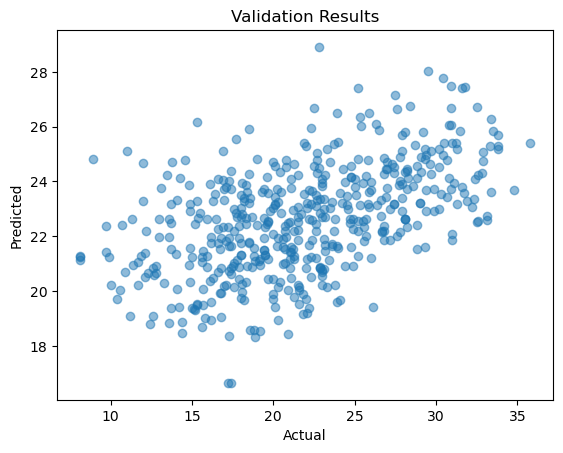

In [59]:
import matplotlib.pyplot as plt

plt.scatter(y_val, val_preds, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Validation Results")
plt.show()
